# Pytorch-Lightning Example
This example shows you how to use an alternative deep learning framework based on Pytorch. This framework allows you to modify more intricate parts of the training loop, data supply and model architecture, but is in return a bit more difficult compared to tensorflow-keras. Just play around!

# Step 1: Add these imports

In [3]:
import os
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data.dataset import TensorDataset
from torch.utils.data import DataLoader
import pytorch_lightning as pl
import numpy as np
import matplotlib.pyplot as plt
from pytorch_lightning.loggers import TensorBoardLogger
import logging

# Step 2: Define a LightningModule (nn.Module subclass)

### A LightningModule defines a full system (ie: a GAN, autoencoder,
### BERT or a simple Image Classifier).

In [4]:
if __name__ == '__main__':
    class LinearRegressionModel(pl.LightningModule):
        def __init__(self, hiddenlayers, output_dim):
            super().__init__()
            self.main = nn.Sequential(
                nn.LazyLinear(hiddenlayers),
                nn.ReLU(True),
                nn.Dropout(p=0.2),
                nn.LazyLinear(hiddenlayers),                
                nn.ReLU(True),
                nn.Dropout(p=0.2),
                nn.LazyLinear(hiddenlayers),
                nn.ReLU(True),
                nn.Dropout(p=0.2),
                nn.LazyLinear(hiddenlayers),
                nn.ReLU(True),
                nn.LazyLinear(predictionHorizon)
            )

        def forward(self, x):
            x = x.view(x.size(0), -1)
            return self.main(x)

        def training_step(self, batch, batch_idx):
            # training_step defines the train loop. It is independent of forward
            x, y = batch
            x = x.view(x.size(0), -1)
            y_predicted = self.main(x)
            loss = F.mse_loss(y_predicted, y)
            self.log("train_loss", loss)
            return loss

        def validation_step(self, batch, batch_idx):
            x, y = batch
            x = x.view(x.size(0), -1)
            y_predicted = self.main(x)
            loss = F.mse_loss(y_predicted, y)
            self.log("val_loss", loss)
            return loss

        def configure_optimizers(self):
            optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
            return optimizer

            ### The Data Loaders ###

            # Question: How do you want to load your data into the model?
            # Define functions for data loading: train / validate / test
        def train_dataloader(self):
            train_dataset = TensorDataset(torch.tensor(x_train).float(),
                                    torch.tensor(y_train).float())
            train_loader = DataLoader(dataset=train_dataset,
                                      batch_size=100,
                                      num_workers=os.cpu_count(),
                                      pin_memory=True)
            return train_loader

        def val_dataloader(self):
            validation_dataset = TensorDataset(torch.tensor(x_valid).float(),
                                               torch.tensor(y_valid).float())
            validation_loader = DataLoader(dataset=validation_dataset,
                                           batch_size=100*4,
                                           num_workers=os.cpu_count(),
                                           pin_memory=True)
            return validation_loader



        # def test_dataloader(self):
        #     test_dataset = TensorDataset(torch.tensor(x_train).float(),
        #                                  torch.tensor(y_train).float())
        #     test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size*2)
        #     return test_loader


    # Note: Training_step defines the training loop. Forward defines how the LightningModule
    # behaves during inference/prediction.

    # ------------------------------------------------------------

# Step 3: Collect Data!
This is some artificial toy data. You would need to integrate the data set here!

timestep is 0.01001001001001001


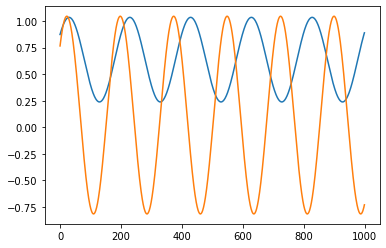

In [5]:

numberOfStates = 2
numberOfTimeSteps = 1000
predictionHorizon = 40
pastHistory = 40
tf = 10

part_training = 0.7
part_validation = 1 - part_training
def generateTrajectory(numberOfStates,numberOfTimeSteps, tf):
    a = np.random.rand(numberOfStates, 1)
    b = np.random.rand(numberOfStates, 1)
    c = np.random.rand(numberOfStates, 1)
    t = np.array(np.linspace(0, tf, numberOfTimeSteps))
    d = np.random.rand(numberOfStates, 1)+np.pi
    dt = t[1] - t[0]
    print("timestep is", dt)

    trajectory = a * np.sin(d*t) + b * np.cos(d*t) + c

    ## For debugging
    #trajectory = np.tile(np.arange(0, numberOfTimeSteps, 1, dtype=int),(numberOfStates,1))
    plt.plot(trajectory.T)
    return trajectory


def dataTimeSeries(trajectory, pastHistory, predictionHorizon):
    data = trajectory[:, (0 + pastHistory):(-1)]
    len_data = data.shape[1]
    time_data = np.empty([0, pastHistory + predictionHorizon])
    for i in range(len_data - (predictionHorizon + pastHistory)):
        x_range = np.arange(i, i + pastHistory + predictionHorizon, 1, dtype=int)
        x_temp = data[:, x_range]
        # print("x_temp = ", x_temp, " and x_range = ", x_range)
        time_data = np.vstack((time_data, x_temp))
        # print("At step",i, "time_data is", time_data )
    x_data = time_data[:, 0:(pastHistory)]
    y_data = time_data[:, pastHistory::]
    return time_data, x_data, y_data


trajectory = generateTrajectory(numberOfStates, numberOfTimeSteps, tf)
time_data, x_data, y_data = dataTimeSeries(trajectory, pastHistory, predictionHorizon)

len_train = int(np.size(x_data, 0) * part_training)
len_val = int(np.size(x_data, 0) - len_train)
x_train = x_data[0:len_train, :]
x_valid = x_data[len_train + 1::, :]
y_train = y_data[0:len_train, :]
y_valid = y_data[len_train + 1::, :]
train = time_data[0:len_train, :]
val = time_data[len_train + 1::, :]

In [6]:
print(x_train)
print(y_train)

[[ 1.01398596  1.00978439  1.00521266 ...  0.66831292  0.6557936
   0.64325528]
 [ 0.86301253  0.8427112   0.82147558 ... -0.2404812  -0.2710704
  -0.30116476]
 [ 1.00978439  1.00521266  1.00027529 ...  0.6557936   0.64325528
   0.63071039]
 ...
 [-0.6511015  -0.63165285 -0.6112467  ...  0.44205451  0.47305077
   0.50358706]
 [ 0.90959273  0.90032257  0.89079083 ...  0.47773045  0.46630747
   0.45505347]
 [-0.63165285 -0.6112467  -0.58990922 ...  0.47305077  0.50358706
   0.53362421]]
[[ 0.63071039  0.61817139  0.6056507  ...  0.26832579  0.26373385
   0.25951184]
 [-0.33072567 -0.3597152  -0.38809615 ... -0.78650749 -0.77756951
  -0.76748679]
 [ 0.61817139  0.6056507   0.59316075 ...  0.26373385  0.25951184
   0.25566395]
 ...
 [ 0.53362421  0.56312367  0.59204758 ...  1.02264147  1.01473107
   1.00566567]
 [ 0.4439796   0.43309686  0.42241603 ...  0.24031169  0.24175429
   0.24358863]
 [ 0.56312367  0.59204758  0.62035885 ...  1.01473107  1.00566567
   0.99545688]]


# Train your Network!

### Define some Dimensions and Parameters!

In [7]:
    input_dim = numberOfStates * pastHistory
    output_dim = numberOfStates * predictionHorizon
    hiddenlayers = 100
    #batch_size = 5

### Load the Tensorboard to track training progress


In [8]:
    %load_ext tensorboard
    logger = TensorBoardLogger('tb_logs', name='prediction_run')    

### Load and train your model

In [9]:
    %tensorboard --logdir tb_logs/
    
    logging.getLogger("lightning").setLevel(logging.ERROR)
    model = LinearRegressionModel(hiddenlayers, output_dim)
    
    trainer = pl.Trainer(max_epochs=20,
                         auto_lr_find=True,
                         fast_dev_run=False,
                         devices="auto",
                         accelerator="auto",
                         #log_save_interval = 100,
                         logger = logger,
                         #max_steps=1000,
                         check_val_every_n_epoch=3,
                         precision=16
                         )
    trainer.fit(model)



/home/jonas/.local/lib/python3.8/site-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/jonas/.local/lib/python3.8/site-packages/pytorch_lightning/utilities/model_summary.py:407: UserWarning: A layer with UninitializedParameter was found. Thus, the total number of parameters detected may be inaccurate.
  warning_cache.warn(

  | Name | Type       | Params
------------------------------------
0 | main | Sequential | 0     
------------------------------------
0         Trainable params
0         Non-trainable params
0         Total params
0.000     Total 

Sanity Checking: 0it [00:00, ?it/s]

/home/jonas/.local/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:1927: PossibleUserWarning: The number of training batches (13) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

### Make a one prediction based on your validation data.
Here you can see if the outcome is reasonable and also how to get numbers back out of your network.

In [10]:
xtest = torch.from_numpy(x_valid).float()
ytest = torch.from_numpy(y_valid).float()
#xtest = xtest.float()
print(np.shape(xtest))
print(xtest.size(0))
y_pred = (model.forward(xtest)).detach().numpy()

torch.Size([527, 40])
527


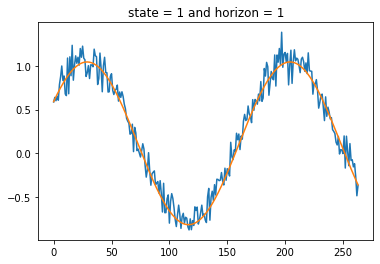

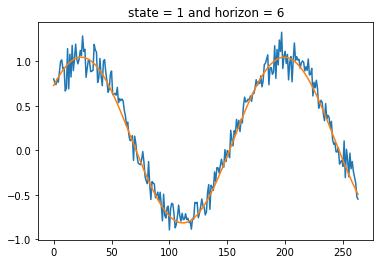

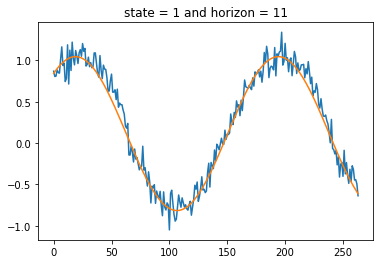

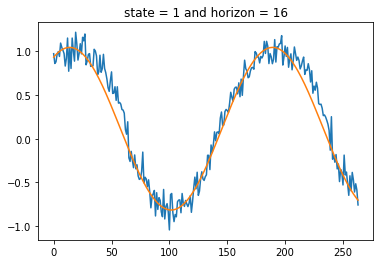

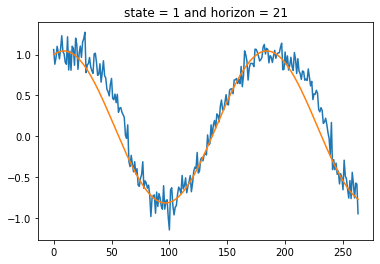

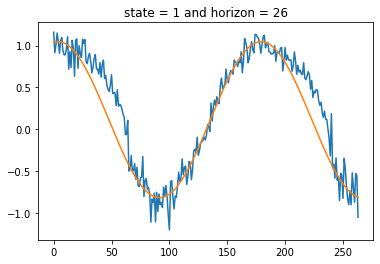

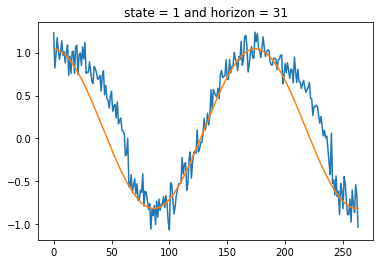

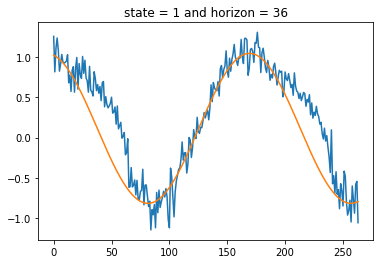

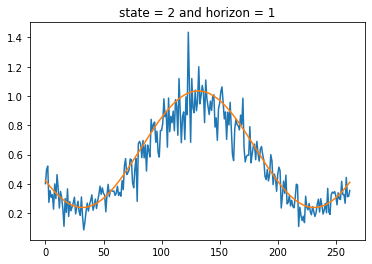

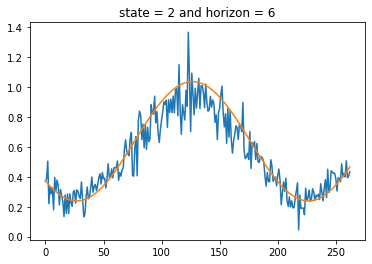

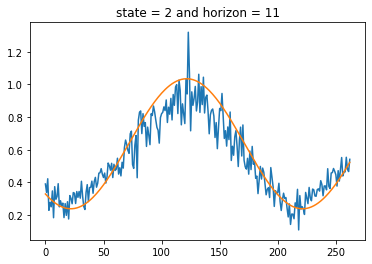

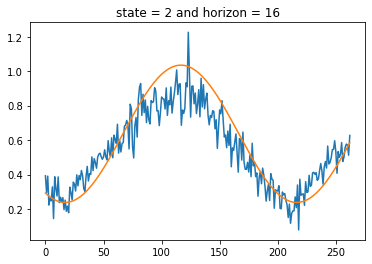

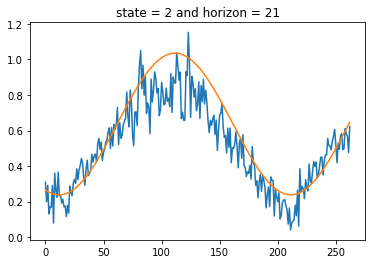

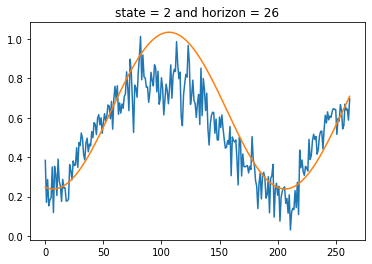

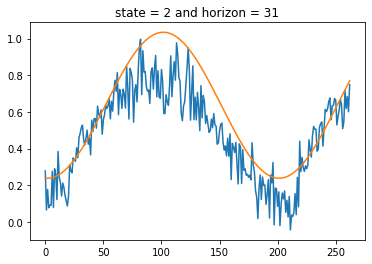

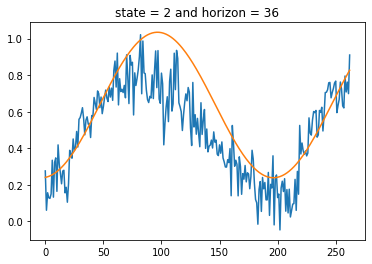

In [11]:
#print(yy)
state_pred = []
state_true = []
for i in range(0,numberOfStates):
    #print(i)
    state_pred.append(y_pred[i::numberOfStates,:])
    state_true.append(ytest[i::numberOfStates,:])
    #print(state)

for i in range(0,numberOfStates):
    for j in range(0,predictionHorizon,5):
        #print(state[i][:])
        plt.figure()
        plt.title('state = ' + str(i+1) + ' and horizon = ' + str(j+1))
        plt.plot(y_pred[i::numberOfStates,j])
        plt.plot(ytest[i::numberOfStates,j])
             